# Non Fiscal State level Data

We are opening all the csv files in the following folders

1. state/2017-2018/data/membership/
2. state/2018-2019/Data/Membership

In [90]:
import pandas as pd
from zipfile import ZipFile
import json
from matplotlib import pyplot as plt
import json
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

myfiles = ["state/2017-2018/data/membership/ccd_sea_052_1718_l_1a_083118.zip",
           "state/2018-2019/Data/Membership/ccd_sea_052_1819_l_1a_091019.zip",
           "state/2016-2017/data/membership/ccd_sea_052_1617_l_1a_11212017_csv.zip"]

membership_df = pd.DataFrame() 

for currentfile in myfiles:
    #print("Opening file:", currentfile, "\n" )
    zip_file = ZipFile(currentfile)

    for text_file in zip_file.infolist():
        if text_file.filename.endswith('.csv'):
            #print("Adding csv to membership_df ", text_file.filename, "\n" )
            myfile_csv = pd.read_csv(zip_file.open(text_file.filename))
            membership_df = pd.concat([membership_df, myfile_csv])


# Print information of membership_df
#print("Years ", membership_df.SCHOOL_YEAR.unique(), "\n" )
print("Columns: ", membership_df.columns.values, "\n" )
#print("TOTAL_INDICATOR: ", membership_df.TOTAL_INDICATOR.unique(), "\n" )
membership_df.head()

Columns:  ['SCHOOL_YEAR' 'FIPST' 'STATENAME' 'ST' 'SEA_NAME' 'STATE_AGENCY_NO'
 'GRADE' 'RACE_ETHNICITY' 'SEX' 'STUDENT_COUNT' 'TOTAL_INDICATOR'
 'DMS_FLAG'] 



,SCHOOL_YEAR,FIPST,STATENAME,ST,SEA_NAME,STATE_AGENCY_NO,GRADE,RACE_ETHNICITY,SEX,STUDENT_COUNT,TOTAL_INDICATOR,DMS_FLAG
0,2017-2018,1,ALABAMA,AL,Alabama State Department of Education,1,Grade 1,American Indian or Alaska Native,Female,241.0,Category Set A - By Race/Ethnicity; Sex; Grade,Reported
1,2017-2018,1,ALABAMA,AL,Alabama State Department of Education,1,Grade 1,American Indian or Alaska Native,Male,256.0,Category Set A - By Race/Ethnicity; Sex; Grade,Reported
2,2017-2018,1,ALABAMA,AL,Alabama State Department of Education,1,Grade 1,Asian,Female,395.0,Category Set A - By Race/Ethnicity; Sex; Grade,Reported
3,2017-2018,1,ALABAMA,AL,Alabama State Department of Education,1,Grade 1,Asian,Male,397.0,Category Set A - By Race/Ethnicity; Sex; Grade,Reported
4,2017-2018,1,ALABAMA,AL,Alabama State Department of Education,1,Grade 1,Black or African American,Female,8924.0,Category Set A - By Race/Ethnicity; Sex; Grade,Reported


# Ethnicity Breakdown
Here are the races listed in the dataset. I am trying to find out the change of racial composition by year nationwide and for the following states: California, New York, and Texas.

In [95]:
membership_df.RACE_ETHNICITY.unique()

array(['American Indian or Alaska Native', 'Asian',
       'Black or African American', 'Hispanic/Latino',
       'Native Hawaiian or Other Pacific Islander', 'Not Specified',
       'Two or more races', 'White', 'No Category Codes'], dtype=object)

In [43]:
membership_df.TOTAL_INDICATOR.unique()

array(['Category Set A - By Race/Ethnicity; Sex; Grade',
       'Derived - Education Unit Total minus Adult Education Count',
       'Derived - Subtotal by Race/Ethnicity and Sex minus Adult Education Count',
       'Education Unit Total', 'Subtotal 4 - By Grade'], dtype=object)

In [52]:
stateenrollment_df = membership_df.groupby(['SCHOOL_YEAR','STATENAME','RACE_ETHNICITY']).agg({'STUDENT_COUNT': ['sum']}).reset_index()
stateenrollment_df.columns = ["_".join(x) for x in stateenrollment_df.columns.ravel()]
stateenrollment_df.rename(columns={'STUDENT_COUNT_sum': 'Race_Count'}, inplace=True)
stateenrollment_df

,SCHOOL_YEAR_,STATENAME_,RACE_ETHNICITY_,Race_Count
0,2016-2017,ALABAMA,American Indian or Alaska Native,13996.0
1,2016-2017,ALABAMA,Asian,21424.0
2,2016-2017,ALABAMA,Black or African American,491060.0
3,2016-2017,ALABAMA,Hispanic/Latino,110806.0
4,2016-2017,ALABAMA,Native Hawaiian or Other Pacific Islander,1538.0
5,2016-2017,ALABAMA,No Category Codes,2234790.0
6,2016-2017,ALABAMA,Not Specified,0.0
7,2016-2017,ALABAMA,Two or more races,32432.0
8,2016-2017,ALABAMA,White,818604.0
9,2016-2017,ALASKA,American Indian or Alaska Native,60756.0


In [51]:
totalenrollment_df = membership_df.groupby(['SCHOOL_YEAR','STATENAME',]).agg({'STUDENT_COUNT': ['sum']}).reset_index()
totalenrollment_df.columns = ["_".join(x) for x in totalenrollment_df.columns.ravel()]
totalenrollment_df.rename(columns={'STUDENT_COUNT_sum': 'Total_Count'}, inplace=True)
totalenrollment_df

,SCHOOL_YEAR_,STATENAME_,Total_Count
0,2016-2017,ALABAMA,3724650.0
1,2016-2017,ALASKA,663685.0
2,2016-2017,AMERICAN SAMOA,0.0
3,2016-2017,ARIZONA,5615685.0
4,2016-2017,ARKANSAS,2467241.0
5,2016-2017,BUREAU OF INDIAN EDUCATION,226995.0
6,2016-2017,CALIFORNIA,31545690.0
7,2016-2017,COLORADO,4525095.0
8,2016-2017,CONNECTICUT,2675590.0
9,2016-2017,DELAWARE,681320.0


In [75]:
jointenrollment_df = pd.merge(totalenrollment_df, stateenrollment_df,  how='left', left_on=['SCHOOL_YEAR_','STATENAME_'], right_on = ['SCHOOL_YEAR_','STATENAME_'])
jointenrollment_df.head()

,SCHOOL_YEAR_,STATENAME_,Total_Count,RACE_ETHNICITY_,Race_Count
0,2016-2017,ALABAMA,3724650.0,American Indian or Alaska Native,13996.0
1,2016-2017,ALABAMA,3724650.0,Asian,21424.0
2,2016-2017,ALABAMA,3724650.0,Black or African American,491060.0
3,2016-2017,ALABAMA,3724650.0,Hispanic/Latino,110806.0
4,2016-2017,ALABAMA,3724650.0,Native Hawaiian or Other Pacific Islander,1538.0


In [61]:
jointenrollment_df['Race_Ratio'] = jointenrollment_df['Race_Count'] / jointenrollment_df['Total_Count']
jointenrollment_df.head()

,SCHOOL_YEAR_,STATENAME_,Total_Count,RACE_ETHNICITY_,Race_Count,Race_Ratio
0,2016-2017,ALABAMA,3724650.0,American Indian or Alaska Native,13996.0,0.003758
1,2016-2017,ALABAMA,3724650.0,Asian,21424.0,0.005752
2,2016-2017,ALABAMA,3724650.0,Black or African American,491060.0,0.131841
3,2016-2017,ALABAMA,3724650.0,Hispanic/Latino,110806.0,0.029749
4,2016-2017,ALABAMA,3724650.0,Native Hawaiian or Other Pacific Islander,1538.0,0.000413


Text(0,0.5,'Students')

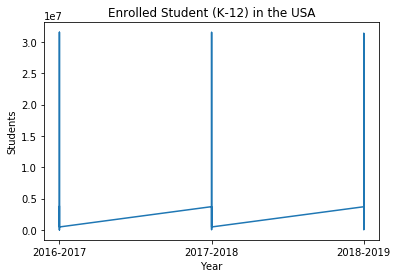

In [62]:
plt.plot(jointenrollment_df.SCHOOL_YEAR_, jointenrollment_df.Total_Count)
plt.title("Enrolled Student (K-12) in the USA")
plt.xlabel('Year')
plt.ylabel('Students')

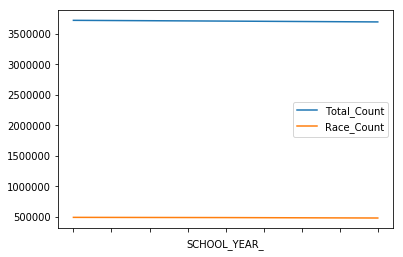

In [81]:
blackenrollment_df.set_index('SCHOOL_YEAR_').plot();

In [78]:
blackenrollment_df.set_index('SCHOOL_YEAR_').plot();

NameError: name 'line' is not defined

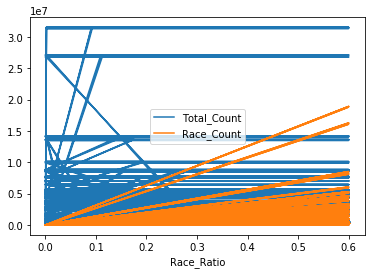

In [74]:
jointenrollment_df.set_index('Race_Ratio').plot();

In [80]:
blackenrollment_df = jointenrollment_df[(jointenrollment_df['RACE_ETHNICITY_'] == 'Black or African American') & 
                                        (jointenrollment_df['STATENAME_'] == 'ALABAMA')]
blackenrollment_df

,SCHOOL_YEAR_,STATENAME_,Total_Count,RACE_ETHNICITY_,Race_Count
2,2016-2017,ALABAMA,3724650.0,Black or African American,491060.0
515,2017-2018,ALABAMA,3712220.0,Black or African American,487446.0
1019,2018-2019,ALABAMA,3698580.0,Black or African American,480380.0


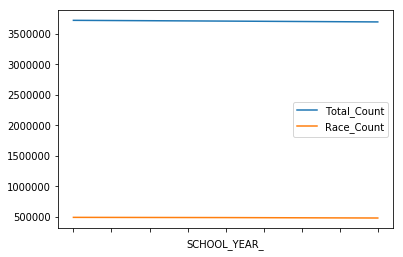

In [82]:
blackenrollment_df.set_index('SCHOOL_YEAR_').plot();

### Student count by State and Year

Create a table that counts how many students where enrolled in 2018-2019 at a State level. We can use groupby state, then filter out the Totat_indicator category that shows all student in that school, then sum that number. Note that the dataset counts students multiple times when dividing by grade/gender or ethnicity/grade. We can verify our results here: https://nces.ed.gov/ccd/elsi/tableGenerator.aspx 


In [24]:
state_counts = membership_df[membership_df.TOTAL_INDICATOR == "Derived - Education Unit Total minus Adult Education Count"].groupby(['SCHOOL_YEAR', 'STATENAME']).sum()

pd.options.display.max_rows =200
state_counts


FIPST  STATE_AGENCY_NO  \
SCHOOL_YEAR STATENAME                                                          
2016-2017   ALABAMA                                       1                1   
            ALASKA                                        2                1   
            AMERICAN SAMOA                               60                1   
            ARIZONA                                       4                1   
            ARKANSAS                                      5                1   
            BUREAU OF INDIAN EDUCATION                   59                1   
            CALIFORNIA                                    6                1   
            COLORADO                                      8                1   
            CONNECTICUT                                   9                1   
            DELAWARE                                     10                1   
            DEPARTMENT OF DEFENSE EDUCATION ACTIVITY     63                1   
            DISTRICT OF COLUMBIA                         11                1   
            FLORIDA                                      12                1   
            GEORGIA                                      13                1   
            GUAM                                         66                1   
            HAWAII                                       15                1   
            IDAHO                                        16                1   
            ILLINOIS                                     17                1   
            INDIANA                                      18                1   
            IOWA                                         19                1   
            KANSAS                                       20                1   
            KENTUCKY                                     21                1   
            LOUISIANA                                    22                1   
            MAINE                                        23                1   
            MARYLAND                                     24                1   
            MASSACHUSETTS                                25                1   
            MICHIGAN                                     26                1   
            MINNESOTA                                    27                1   
            MISSISSIPPI                                  28                1   
            MISSOURI                                     29                1   
            MONTANA                                      30                1   
            NEBRASKA                                     31                1   
            NEVADA                                       32                1   
            NEW HAMPSHIRE                                33                1   
            NEW JERSEY                                   34                1   
            NEW MEXICO                                   35                1   
            NEW YORK                                     36                1   
            NORTH CAROLINA                               37                1   
            NORTH DAKOTA                                 38                1   
            OHIO                                         39                1   
            OKLAHOMA                                     40                1   
            OREGON                                       41                1   
            PENNSYLVANIA                                 42                1   
            PUERTO RICO                                  72                1   
            RHODE ISLAND                                 44                1   
            SOUTH CAROLINA                               45                1   
            SOUTH DAKOTA                                 46                1   
            TENNESSEE                                    47                1   
            TEXAS                                     